### Limpieza y exploración de datos de educación obtenidos del INEGI

In [66]:
#Realizando los imports necesarios
import pandas as pd
import missingno as msno
import plotly.express as px


In [83]:
#Leyendo los datos
educacion_data_raw = pd.read_excel('../data/raw/INEGI_SONORA_FILTRO/268_educacion_26_xlsx/educacion_26.xlsx')
educacion_data_raw.head()

,cve_entidad,desc_entidad,cve_municipio,desc_municipio,id_indicador,indicador,1910,1921,1930,1940,...,2010,2011,2012,2013,2014,2015,2016,2017,2020,unidad_medida
0,26,Sonora,0,Estatal,1002000041,Porcentaje de personas de 15 años y más alfabetas,NaN,NaN,NaN,NaN,...,96.25,NaN,NaN,NaN,NaN,96.6749699434904,NaN,NaN,NaN,Porcentaje
1,26,Sonora,0,Estatal,1002000050,Tasa de alfabetización de las personas de 15 a...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.99785,Tasa
2,26,Sonora,0,Estatal,1005000012,Población de 5 años y más que asiste a la escuela,NaN,NaN,NaN,NaN,...,743126.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Personas
3,26,Sonora,0,Estatal,1005000038,Grado promedio de escolaridad de la población ...,NaN,NaN,NaN,NaN,...,9.42,NaN,NaN,NaN,NaN,10.0014293654817,NaN,NaN,NaN,Años de escolaridad
4,26,Sonora,0,Estatal,3108001001,Porcentaje de analfabetas total,53.1,45.5,43.9,33.1,...,3.04,NaN,NaN,NaN,NaN,2.16904389627038,NaN,NaN,NaN,Porcentaje


In [85]:
#Eliminando columnas que no nos vayan a servir
educacion_data_raw.drop(['cve_entidad', 'desc_entidad', 'cve_municipio', 'id_indicador'], axis=1, inplace=True)

In [86]:
educacion_data_raw.head()

,desc_municipio,indicador,1910,1921,1930,1940,1950,1960,1970,1980,...,2010,2011,2012,2013,2014,2015,2016,2017,2020,unidad_medida
0,Estatal,Porcentaje de personas de 15 años y más alfabetas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,96.25,NaN,NaN,NaN,NaN,96.6749699434904,NaN,NaN,NaN,Porcentaje
1,Estatal,Tasa de alfabetización de las personas de 15 a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.99785,Tasa
2,Estatal,Población de 5 años y más que asiste a la escuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,743126.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Personas
3,Estatal,Grado promedio de escolaridad de la población ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.42,NaN,NaN,NaN,NaN,10.0014293654817,NaN,NaN,NaN,Años de escolaridad
4,Estatal,Porcentaje de analfabetas total,53.1,45.5,43.9,33.1,27.2,19.7,14.8,8.5,...,3.04,NaN,NaN,NaN,NaN,2.16904389627038,NaN,NaN,NaN,Porcentaje


In [87]:
lista_indicadores = ['Población de 5 años y más que asiste a la escuela',
                    'Población de 8 a 14 años que sabe leer y escribir',
                    'Porcentaje de la población de 3 a 5 años que asiste a la escuela',
                    'Porcentaje de la población de 6 a 11 años que asiste a la escuela',
                    'Porcentaje de la población de 12 a 14 años que asiste a la escuela',
                    'Porcentaje de la población de 3 a 5 años que asiste a la escuela en otro municipio o delegación diferente al de residencia',
                    'Porcentaje de la población de 6 a 11 años que asiste a la escuela en otro municipio o delegación diferente al de residencia',
                    'Porcentaje de la población de 12 a 14 años que asiste a la escuela en otro municipio o delegación diferente al de residencia',
                    'Población de 6 a 14 años que sabe leer y escribir',
                    'Población de 6 a 14 años que no sabe leer y escribir',
                    'Porcentaje de la población de 3 años y más que asiste a la escuela',
                    'Porcentaje de la población de 3 años y más que no asiste a la escuela',
                    'Razón entre niñas y niños en la enseñanza secundaria',
                    'Razón entre niñas y niños en la enseñanza primaria',
]

In [88]:
educacion_data = educacion_data_raw[educacion_data_raw['indicador'].isin(lista_indicadores)].copy()

In [89]:
educacion_data.head()

,desc_municipio,indicador,1910,1921,1930,1940,1950,1960,1970,1980,...,2010,2011,2012,2013,2014,2015,2016,2017,2020,unidad_medida
2,Estatal,Población de 5 años y más que asiste a la escuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,743126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Personas
8,Estatal,Población de 8 a 14 años que sabe leer y escribir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,352346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Número de personas
19,Estatal,Porcentaje de la población de 3 a 5 años que a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,53.37735,NaN,NaN,53.929240,Porcentaje
20,Estatal,Porcentaje de la población de 6 a 11 años que ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,97.239787,NaN,NaN,96.256390,Porcentaje
21,Estatal,Porcentaje de la población de 12 a 14 años que...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,94.471037,NaN,NaN,93.448738,Porcentaje


<AxesSubplot:>

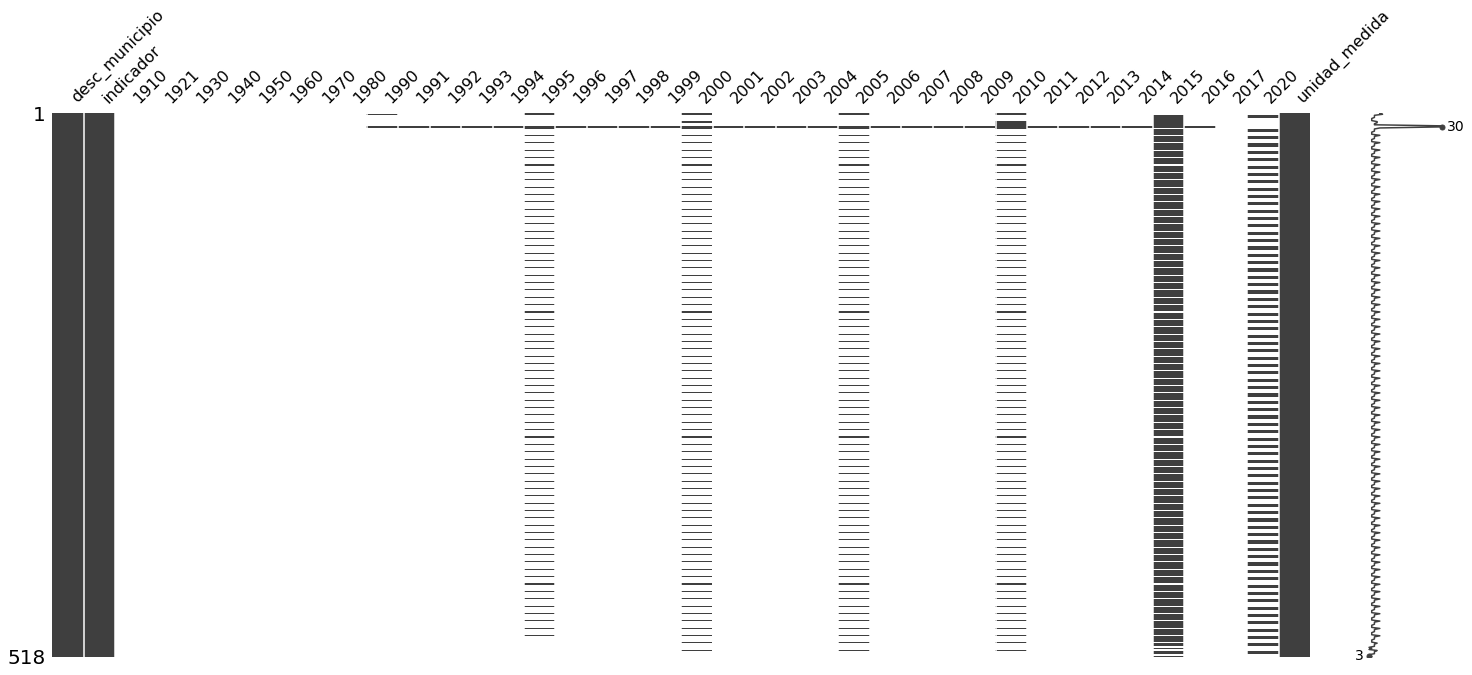

In [90]:
#Observamos los valores perdidos
msno.matrix(educacion_data)

In [91]:
#Primero tomaremos aquellos indicadores que tengan valores en el 2020
educacion_data = educacion_data[educacion_data['2020'].notnull()].copy()

In [92]:
educacion_data['indicador'].unique()

array(['Porcentaje de la población de 3 a 5 años que asiste a la escuela',
       'Porcentaje de la población de 6 a 11 años que asiste a la escuela',
       'Porcentaje de la población de 12 a 14 años que asiste a la escuela'],
      dtype=object)

In [76]:
educacion_2020 = educacion_data[['desc_municipio', 'indicador', '2020']].copy()
educacion_2020.head()

,desc_municipio,indicador,2020
19,Estatal,Porcentaje de la población de 3 a 5 años que a...,53.929240
20,Estatal,Porcentaje de la población de 6 a 11 años que ...,96.256390
21,Estatal,Porcentaje de la población de 12 a 14 años que...,93.448738
47,Aconchi,Porcentaje de la población de 3 a 5 años que a...,78.448276
48,Aconchi,Porcentaje de la población de 6 a 11 años que ...,97.489540


In [77]:
#Ya podemos analizar Indicador por Indicador para cada municipio
dff = educacion_2020[educacion_2020['indicador'] == 'Porcentaje de la población de 3 a 5 años que asiste a la escuela'].copy()
dff = dff.sort_values('2020')
dff

,desc_municipio,indicador,2020
1037,San Miguel de Horcasitas,Porcentaje de la población de 3 a 5 años que a...,33.381713
1019,San Luis Río Colorado,Porcentaje de la población de 3 a 5 años que a...,41.660102
461,Divisaderos,Porcentaje de la población de 3 a 5 años que a...,42.857143
803,Nogales,Porcentaje de la población de 3 a 5 años que a...,44.034707
929,Rayón,Porcentaje de la población de 3 a 5 años que a...,44.776119
...,...,...,...
623,Huatabampo,Porcentaje de la población de 3 a 5 años que a...,68.953069
47,Aconchi,Porcentaje de la población de 3 a 5 años que a...,78.448276
605,Huásabas,Porcentaje de la población de 3 a 5 años que a...,78.947368
641,Huépac,Porcentaje de la población de 3 a 5 años que a...,80.487805


In [78]:
fig = px.bar(dff, x="2020", y="desc_municipio", orientation='h', width=800, height=1280, template='ggplot2',
                labels={'desc_municipio':'Municipio',
                '2020': 'Porcentaje'},
                title='Porcentaje de la población de 3 a 5 años que asiste a la escuela')
fig.show()

In [79]:
#Ya podemos analizar Indicador por Indicador para cada municipio
dff = educacion_2020[educacion_2020['indicador'] == 'Porcentaje de la población de 6 a 11 años que asiste a la escuela'].copy()
dff = dff.sort_values('2020')
dff

,desc_municipio,indicador,2020
858,Oquitoa,Porcentaje de la población de 6 a 11 años que ...,86.486486
1236,Villa Hidalgo,Porcentaje de la población de 6 a 11 años que ...,86.842105
1038,San Miguel de Horcasitas,Porcentaje de la población de 6 a 11 años que ...,87.500000
1272,Yécora,Porcentaje de la población de 6 a 11 años que ...,88.718929
1092,Santa Cruz,Porcentaje de la población de 6 a 11 años que ...,89.671362
...,...,...,...
1200,Tubutama,Porcentaje de la población de 6 a 11 años que ...,99.224806
462,Divisaderos,Porcentaje de la población de 6 a 11 años que ...,100.000000
984,San Felipe de Jesús,Porcentaje de la población de 6 a 11 años que ...,100.000000
606,Huásabas,Porcentaje de la población de 6 a 11 años que ...,100.000000


In [80]:
fig = px.bar(dff, x="2020", y="desc_municipio", orientation='h', width=800, height=1280, template='ggplot2',
                labels={'desc_municipio':'Municipio',
                '2020': 'Porcentaje'},
                title='Porcentaje de la población de 6 a 11 años que asiste a la escuela')
fig.show()

In [81]:
#Ya podemos analizar Indicador por Indicador para cada municipio
dff = educacion_2020[educacion_2020['indicador'] == 'Porcentaje de la población de 12 a 14 años que asiste a la escuela'].copy()
dff = dff.sort_values('2020')
dff

,desc_municipio,indicador,2020
1039,San Miguel de Horcasitas,Porcentaje de la población de 12 a 14 años que...,77.253219
427,Cucurpe,Porcentaje de la población de 12 a 14 años que...,79.032258
1183,Trincheras,Porcentaje de la población de 12 a 14 años que...,83.098592
409,La Colorada,Porcentaje de la población de 12 a 14 años que...,83.116883
1129,Soyopa,Porcentaje de la población de 12 a 14 años que...,83.823529
...,...,...,...
841,Opodepe,Porcentaje de la población de 12 a 14 años que...,98.496241
985,San Felipe de Jesús,Porcentaje de la población de 12 a 14 años que...,100.000000
1147,Suaqui Grande,Porcentaje de la población de 12 a 14 años que...,100.000000
463,Divisaderos,Porcentaje de la población de 12 a 14 años que...,100.000000


In [82]:
fig = px.bar(dff, x="2020", y="desc_municipio", orientation='h', width=800, height=1280, template='ggplot2',
                labels={'desc_municipio':'Municipio',
                '2020': 'Porcentaje'},
                title='Porcentaje de la población de 12 a 14 años que asiste a la escuela')
fig.show()

### Comparativa 2015 - 2020

In [151]:
educacion_comparativa = educacion_data[['desc_municipio', 'indicador', '2015','2020']].copy()
educacion_comparativa['2']
educacion_comparativa['2015'] = educacion_comparativa['2015'].astype('float')
educacion_comparativa['2020'] = educacion_comparativa['2020'].astype('float')
educacion_comparativa.head()

ValueError: could not convert string to float: 'MI'

In [150]:
educacion_comparativa['delta'] = educacion_comparativa['2020'] - educacion_comparativa['2015']

TypeError: unsupported operand type(s) for -: 'float' and 'str'

In [117]:
dff = educacion_comparativa[educacion_comparativa['indicador'] == 'Porcentaje de la población de 3 a 5 años que asiste a la escuela']
dff = pd.melt(dff, id_vars='desc_municipio', value_vars=['2015','2020'], value_name='porcentaje')
dff = dff[dff['porcentaje'] != 'MI']
dff['porcentaje'] = dff['porcentaje'].astype('float')
dff['variable'] =  dff['variable'].astype('int64')
dff

,desc_municipio,variable,porcentaje
0,Estatal,2015,53.377350
1,Aconchi,2015,56.617647
2,Agua Prieta,2015,46.522782
3,Alamos,2015,64.163569
4,Altar,2015,54.973822
...,...,...,...
141,Villa Pesqueira,2020,65.517241
142,Yécora,2020,50.378788
143,General Plutarco Elías Calles,2020,51.552795
144,Benito Juárez,2020,54.726800


In [105]:
import plotly.graph_objects as go
dff = educacion_comparativa[educacion_comparativa['indicador'] == 'Porcentaje de la población de 3 a 5 años que asiste a la escuela']
dff = pd.melt(dff, id_vars='desc_municipio', value_vars=['2015','2020'], value_name='porcentaje')

fig = go.Figure(go.Scatter(x=dff.variable, y=dff.porcentaje, mode='lines+markers+text', 
                           text=['start', 'end'], textposition=['middle left', 'middle right']))
fig.add_shape(type='line', x0=2020, x1=2020, y0=0, y1=1, xref='x', yref='paper')
fig.add_shape(type='line', x0=2015, x1=2015, y0=0, y1=1, xref='x', yref='paper')
fig.show()

In [120]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 145
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   desc_municipio  145 non-null    object 
 1   variable        145 non-null    int64  
 2   porcentaje      145 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.5+ KB


<AxesSubplot:xlabel='variable', ylabel='porcentaje'>

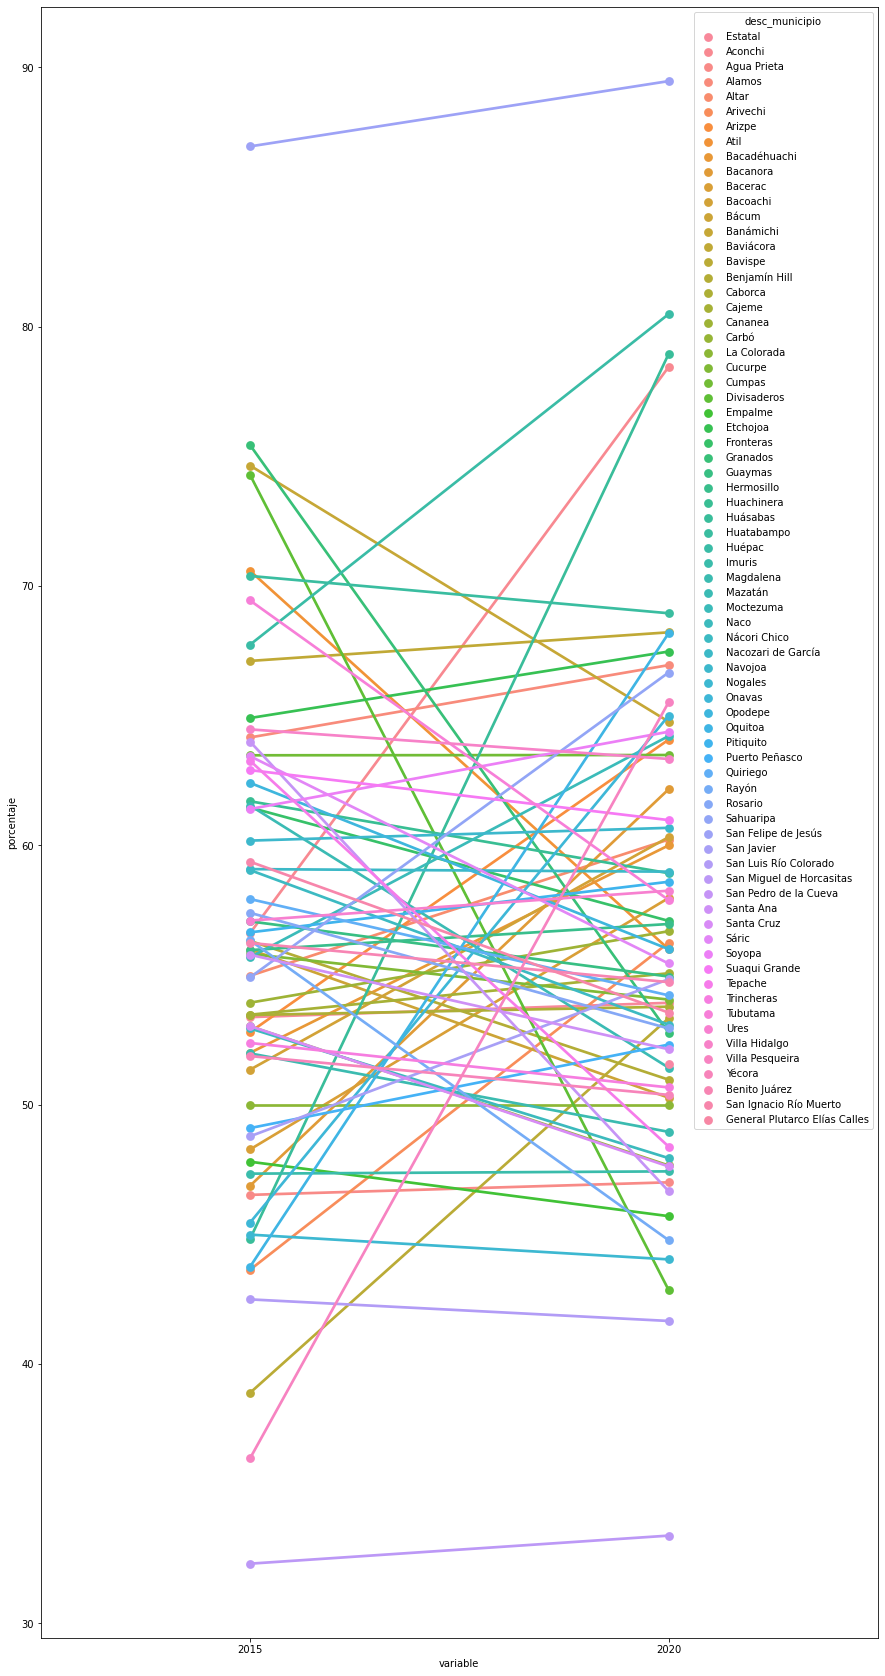

In [125]:
import seaborn as sns
plt.figure(figsize=(15,30))

sns.pointplot(x="variable", y="porcentaje", data=dff, hue = 'desc_municipio', )


In [142]:
dff[dff['desc_municipio'] == 'Aconchi']['porcentaje'].iloc[0]

56.617647

In [160]:
dff['variable'] = dff['variable'].astype('category')
fig = px.bar(dff, y="desc_municipio", x="porcentaje", color='variable',barmode='group',orientation='h',
            labels={'nivel_escolaridad':'Escolaridad'},  width=800, height=1280)
fig.show()

In [147]:
import plotly.graph_objects as go

fig = go.Figure(go.Scatter(x=[2020, 2021], y=[10, 6], mode='lines+markers+text', 
                           text=['start', 'end'], textposition=['middle left', 'middle right']))
for i in dff['desc_municipio'].unique():
    try:
        var_2015 = dff[dff['desc_municipio'] == i]['porcentaje'].iloc[0]
        var_2020 = dff[dff['desc_municipio'] == i]['porcentaje'].iloc[1]
    except:
        continue
    fig.add_trace(go.Scatter(x=[2020, 2021], y=[var_2015, var_2020], mode='lines+markers+text', 
                            text=[i, i], textposition=['middle left', 'middle right']))
fig.add_shape(type='line', x0=2020, x1=2020, y0=0, y1=1, xref='x', yref='paper')
fig.add_shape(type='line', x0=2021, x1=2021, y0=0, y1=1, xref='x', yref='paper')
fig.show()